<h1> <a href='http://interactivepython.org/runestone/static/pythonds/AlgorithmAnalysis/toctree.html'> Assignment 2:  Algorithm Analysis  </a> </h1>

<h3> <a href='http://interactivepython.org/runestone/static/pythonds/AlgorithmAnalysis/ProgrammingExercises.html'> 2.11 Programming Exercises  </a> </h3>

Q1: What are the time complexity with Big-O notation for each of the following operations?
* list index operator
* dictionary get operator
* dictionary set operator
* del operator for lists 
* del operator for dictionaries 


Answers:
   * O(1)
   * O(1)
   * O(1) 
   * O(N)
   * O(1) 

Q2: (Continue) The following is an experiment to verify the time complexity of operations mentioned above.
 Fill in one of the five timeit.Timer objects (oa, ob,oc,od,oe) in the program  that are used to measure the perfromance of the following 
* list index operator             
* Ans: ____oa_______ (Choose one of the objects oa, ob,oc,od,oe in the program.) 
* dictionary get operator         
* Ans: ______ob________ (Choose one of the objects oa, ob,oc,od,oe in the program.)
* dictionary set operator  
* Ans: _______oc______ (Choose one of the objects oa, ob,oc,od,oe in the program.)
* del operator for lists   A
* Ans: ______od________ (Choose one of the objects oa, ob,oc,od,oe in the program.)
* del operator for dictionaries   
* Ans: _________oe_____ (Choose one of the objects oa, ob,oc,od,oe in the program.)

In [46]:
"""

#2.1 Devise an experiment to verify that the list index operator is O(1)
#2.2 Devise an experiment to verify that get item and set item are O(1) for dictionaries.
#2.3 Devise an experiment that compares the performance of the 
      del operator on lists and dictionaries.
      
"""
import timeit
import random as r

oa = timeit.Timer("for i in L: lis[i]", "from __main__ import lis,L")
ob = timeit.Timer("for i in L: dict[i]", "from __main__ import dict,L")
oc = timeit.Timer("for i in L: dict[i]=-i", "from __main__ import dict,L")

od = timeit.Timer("for i in L: del lis[i]", "from __main__ import  lis,L; ")
oe = timeit.Timer("for i in L: del dict[i]", "from __main__ import  dict,L; ")


inc = 100000   #100000
print("%8s: %15s %15s %15s %15s %15s " \
      %("index", "list_index","dict_get","dict_set", "list_del", "dict_del" ))
num_repeats = 1       # 100000
m = 100
X= list ( range ( inc, inc*11, inc))
A=[]; B=[]; C=[]; D=[]; E=[]
for n in X :
    lis = list(range(n))
    dict = { i : i for i in lis }
    L = list(range(0,n-m, n//m ))  # index
       
    a = oa.timeit(number=num_repeats)
    b = ob.timeit(number=num_repeats)
    c = oc.timeit(number=num_repeats)
    A.append ( a )
    B.append ( b )
    C.append ( c)
    
    d = od.timeit(number=num_repeats)
    e = oe.timeit(number=num_repeats)

    D.append(d)
    E.append (e )
    print("%8d: %15.5f %15.5f %15.5f %15.5f %15.5f " %(n, \
    a, b, c, d, e  ))


   index:      list_index        dict_get        dict_set        list_del        dict_del 
  100000:         0.00003         0.00003         0.00001         0.00151         0.00004 
  200000:         0.00003         0.00003         0.00001         0.00298         0.00005 
  300000:         0.00003         0.00003         0.00001         0.00453         0.00005 
  400000:         0.00003         0.00003         0.00001         0.00574         0.00004 
  500000:         0.00003         0.00003         0.00001         0.00588         0.00003 
  600000:         0.00003         0.00003         0.00001         0.00677         0.00004 
  700000:         0.00003         0.00003         0.00001         0.00879         0.00004 
  800000:         0.00003         0.00003         0.00001         0.01114         0.00005 
  900000:         0.00003         0.00003         0.00001         0.01246         0.00005 
 1000000:         0.00003         0.00003         0.00001         0.01432         0.00005 

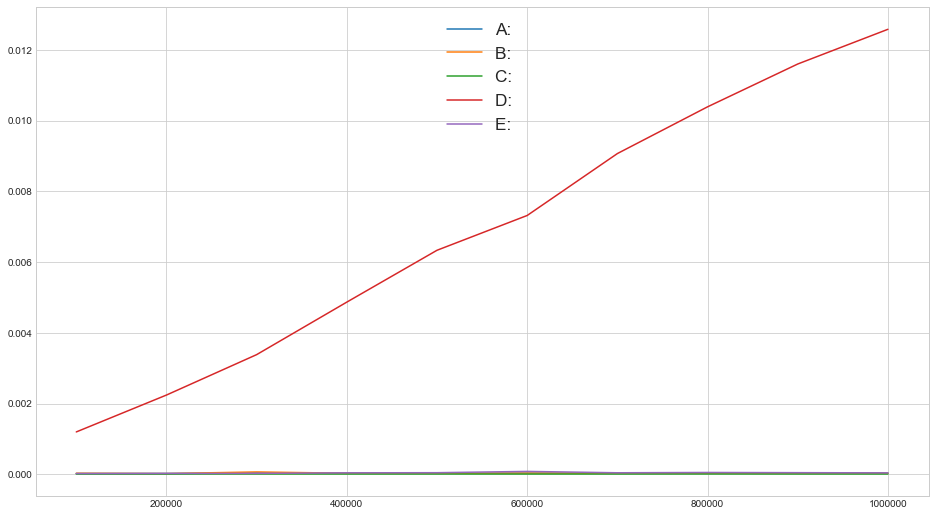

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,9))


plt.plot(X, A, label="A: ")
plt.plot(X, B, label='B: ')
plt.plot(X, C, label='C: ')

plt.plot(X, D, label="D: ")
plt.plot(X, E, label='E: ')

plt.legend(loc="upper center", fontsize="xx-large")
plt.show()

In [40]:
import itertools
from timeit import Timer
import random
import string

# Assume len(s1)==len(s2)
def anagramSolution1(s1,s2):  # O(N^2)
    alist = list(s2)          # string s2 is immutable, alist is mutable

    pos1 = 0
    stillOK = True

    while pos1 < len(s1) and stillOK:    # for each position in string s1 O(N)
        pos2 = 0
        found = False
        while pos2 < len(alist) and not found:  # check if the current char exists on alist O(N)
            if s1[pos1] == alist[pos2]:
                found = True
            else:
                pos2 = pos2 + 1                 # if not found, move to next position

        if found:
            alist[pos2] = None
        else:
            stillOK = False

        pos1 = pos1 + 1

    return stillOK



def anagramSolution2(s1,s2): # O(n log n)
    """
    If s1 and s2 are sorted first, then they are anagram if s1==s2 

    @param param1: the 1st string
    @param param2: second string
    @return: true if s1 and s2 are anagram
    @raise keyError: raises an exception
    """
    alist1 = list(s1)
    alist2 = list(s2)


    alist1.sort()
    alist2.sort()
    #return alist1 == alist2
    
    
    pos = 0
    matches = True

    while pos < len(s1) and matches:
        if alist1[pos]==alist2[pos]:
            pos = pos + 1
        else:
            matches = False
    return matches

# def anagramSolution3(s1,s2): # O(n!) >  O(2^n)
#     for s3 in itertools.permutations(s1):
#         if "".join(s3)==s2:
#             return True
#     return theSum

def anagramSolution4(s1,s2):  # O(n)
    """
      count and compare
    """
    c1 = [0]*26

    n = len(s1)
    x = ord('a')
    for i in range( n ):
        pos = ord(s1[i])-x
        c1[pos] += 1
        pos = ord(s2[i])-x
        c1[pos] -=  1

    for i in c1:
        if i != 0:
            return False

    return True

def demo():
    x,y = randomword (5)
    L = ( (x,y), ('abcd','dcba'), ('abcde','edcba'), ('abcde','edcba'), ('apple','pleap'), ('python', 'typhon'))
    for z in L:
        x = z[0]; y = z[1];
        assert (anagramSolution1(x,y))
        assert (anagramSolution2(x,y))
#         assert (anagramSolution3(x,y))
        assert (anagramSolution4(x,y))



def randomword(length):
    allchar = string.ascii_lowercase 
    L = [random.choice(allchar) for i in range(length) ]
    random.shuffle(L)
    x = ''.join(L)
    random.shuffle(L)
    y = ''.join(L)
    return x,y

demo() 

inc = 1000
X= list ( range ( inc, inc*11, inc))
A=[]; B=[]; C=[];
if True:
    print("%8s: %15s %15s %15s " \
      %("index", "solution1","solution2","solution4"))
    for n in X:
        x,y = randomword(n)
        M=1
        t1 = Timer("anagramSolution1(x,y)", "from __main__ import anagramSolution1, x, y ")
        t2 = Timer("anagramSolution2(x,y)", "from __main__ import anagramSolution2, x, y ")
        t4 = Timer("anagramSolution4(x,y)", "from __main__ import anagramSolution4, x,y ")
        a = t1.timeit(number=M)
        b = t2.timeit(number=M)
        c = t4.timeit(number=M)
        A.append ( a )
        B.append ( b )
        C.append ( c)
        print("%8d: %15.5f %15.5f %15.5f " %(n, \
        a, b, c ))

   index:       solution1       solution2       solution4 
    1000:         0.10247         0.00057         0.00036 
    2000:         0.38772         0.00112         0.00070 
    3000:         0.89832         0.00183         0.00116 
    4000:         1.58653         0.00227         0.00137 
    5000:         2.46292         0.00294         0.00204 
    6000:         3.52651         0.00358         0.00206 
    7000:         4.86562         0.00423         0.00259 
    8000:         6.36836         0.00490         0.00292 
    9000:         7.95949         0.00515         0.00309 
   10000:         9.93854         0.00595         0.00350 


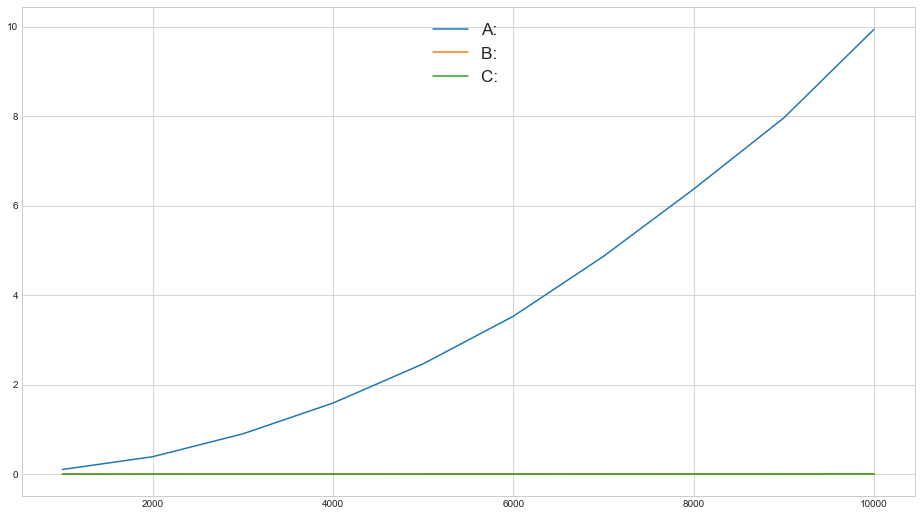

In [44]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,9))


plt.plot(X, A, label="A: ")
plt.plot(X, B, label='B: ')
plt.plot(X, C, label='C: ')

plt.legend(loc="upper center", fontsize="xx-large")
plt.show()

#   END of ASSIGNMENT